In [ ]:
##### Good job!

# Week 2 Exercises

In this weeks exercises you will use Numpy/Scipy to impliment some numerical algorithms and then you will use Pandas to perform a rudamentary data analysis using the KDD 98 dataset.  Along the way you will use unix/basic python from the first week as well as git to save your work.

As a first step we import the libraries we'll use later on.  This allows us to use numpy library calls by prefixing the call with np.

In [984]:
#Import the libraries 
import numpy as np
import scipy as sp
import pandas as pd

## Matrix Manipulations
Lets first create a matrix and perform some manipulations of it.

Using numpy's matrix data structure, define the following matricies:

$$A=\left[ \begin{array}{ccc} 3 & 5 & 9 \\ 3 & 3 & 4 \\ 5 & 9 & 17 \end{array} \right]$$

$$B=\left[ \begin{array}{c} 2 \\ 1 \\ 4 \end{array} \right]$$

After this solve the matrix equation:
$$Ax = B$$

Now write three functions for matrix multiply $C=AB$ in each of the following styles:

1. By using nested for loops to impliment the naive algorithm ($C_{ij}=\sum_{k=0}^{m-1}A_{ik}B_{kj}$)
2. Using numpy's built in martrix multiplication  
3. Using Cython

The three methods should have the same answer

In [985]:
#define both matrices
A = np.array([[3,5,9],[3,3,4],[5,9,17]])
B = np.array([[2],[1],[4]])
print(A)
print(B)

[[ 3  5  9]
 [ 3  3  4]
 [ 5  9 17]]
[[2]
 [1]
 [4]]


In [986]:
#solve the matrix equation x = (A)^-1 * B
import numpy as np
x = np.dot(np.linalg.inv(A), B) 
x

array([[ 1.],
       [-2.],
       [ 1.]])

In [987]:
#method 1 - nested for loops
C = np.zeros([len(A),len(B[0])])
for i in range(len(A)):
    for j in range(len(B[0])):
        for k in range(len(B)):
            C[i][j] += A[i][k] * B[k][j]
C

array([[47.],
       [25.],
       [87.]])

In [988]:
#method 2 - numpy 
C = np.dot(A,B)
C

array([[47],
       [25],
       [87]])

In [989]:
#method 3 - cython
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [990]:
%%cython
cimport numpy as np

#define cython function to compute dot product
def cython_dot(np.ndarray[np.float64_t, ndim=2] A,np.ndarray[np.float64_t, ndim=2] B,np.ndarray[np.float64_t, ndim=2] C):
    cdef long i = 0
    cdef long j = 0
    cdef long k = 0
    for i in range(A.shape[0]):
        for j in range(B.shape[1]):
             for k in range(B.shape[0]):
                C[i][j] += A[i][k] * B[k][j]
    return C

In [991]:
C_empty = np.zeros([A.shape[0],B.shape[1]])
C = cython_dot(np.float64(A),np.float64(B),np.float64(C_empty))
C

array([[47.],
       [25.],
       [87.]])

Now we wish to evaluate the performance of these three methods.  Write a method that given three dmiensions (a,b,c) makes a random a x b and b x c matrix and computes the product using your three functions and reports the speed of each method.

After this measure performance of each method for all $a,b,c \in \{10,100,1000,10000\}$ and plot the results.  Is one method always the fastest?  Discuss why this is or is not the case.

In [992]:
#Now we wish to evaluate the performance of these three methods.  Write a method that given three dmiensions 
#(a,b,c) makes a random a x b and b x c matrix and computes the product using your three functions and reports 
#the speed of each method.

#Prompt user to give the matrix dimensions (a,b,c)
#Matrix X will be of size axb
#Matrix Y will be of size bxc
a = input('Enter dimension value for "a": ')
b = input('Enter dimension value for "b": ')
c = input('Enter dimension value for "c": ')

Enter dimension value for "a": 3
Enter dimension value for "b": 3
Enter dimension value for "c": 3


In [993]:
#Create X and Y random matrices
import random

max_num = 10
X = np.random.randint(max_num, size = (int(a),int(b)))
Y = np.random.randint(max_num, size = (int(b),int(c)))
print(X)
print(Y)

[[5 0 3]
 [3 7 9]
 [3 5 2]]
[[4 7 6]
 [8 8 1]
 [6 7 7]]


In [994]:
#method 1 - nested for loops
def nested_loops(X,Y):
    C = np.zeros([len(X),len(Y[0])])
    for i in range(len(X)):
        for j in range(len(Y[0])):
            for k in range(len(Y)):
                C[i][j] += X[i][k] * Y[k][j]
    return C          

In [995]:
%time
C = nested_loops(X,Y)
C

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 12.4 µs


array([[ 38.,  56.,  51.],
       [122., 140.,  88.],
       [ 64.,  75.,  37.]])

In [996]:
#method 2 - numpy 
%time
C = np.dot(X,Y)
C

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 11.9 µs


array([[ 38,  56,  51],
       [122, 140,  88],
       [ 64,  75,  37]])

In [998]:
#method 3 - cython
%time
C_empty = np.zeros([X.shape[0],Y.shape[1]])
C = cython_dot(np.float64(X),np.float64(Y),np.float64(C_empty))
print(C)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 12.4 µs
[[ 38.  56.  51.]
 [122. 140.  88.]
 [ 64.  75.  37.]]


In [999]:
#After this measure performance of each method for all $a,b,c \in \{10,100,1000,10000\}$ and plot the results.  
#Is one method always the fastest?  Discuss why this is or is not the case.

import time
import numpy as np
import pandas as pd
import random

dimension_size = [10,40,80,100,150,200] #define different sizes
execution_time=[]
method = []
matrix_size = []
for i in dimension_size:
    #generate matrices
    max_num = 10
    X = np.random.randint(max_num, size = (i,i))
    Y = np.random.randint(max_num, size = (i,i))
    
    #method 1 - nested for loops
    start_time = time.time()
    C1 = nested_loops(X,Y)
    execution_time.append((time.time()-start_time)*1000)
    method.append('nested loops')
    matrix_size.append(i)
    
    #method 2 - numpy 
    start_time = time.time()
    C2 = np.dot(X,Y)
    execution_time.append((time.time()-start_time)*1000)
    method.append('numpy')
    matrix_size.append(i)
                          
    #method 3 - cython
    start_time = time.time()
    C_empty = np.zeros([X.shape[0],Y.shape[1]])
    C3 = cython_dot(np.float64(X),np.float64(Y),np.float64(C_empty))
    execution_time.append((time.time()-start_time)*1000)
    method.append('cython')
    matrix_size.append(i)


#put everything together in a dataframe
df = pd.DataFrame({'execution_time_ms':execution_time,'method':method,'matrix_size':matrix_size})
df

,execution_time_ms,method,matrix_size
0,1.620531,nested loops,10
1,0.029325,numpy,10
2,0.905752,cython,10
3,111.780167,nested loops,40
4,0.103712,numpy,40
5,65.276623,cython,40
6,697.837591,nested loops,80
7,0.462294,numpy,80
8,425.506592,cython,80
9,1936.774969,nested loops,100


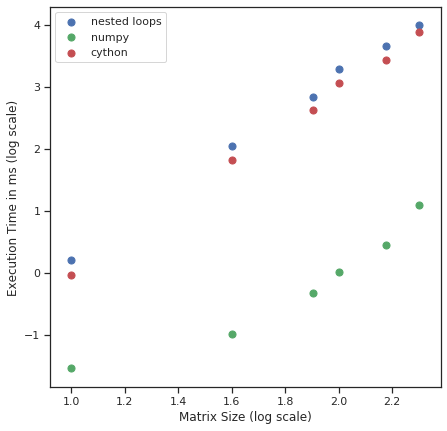

In [1000]:
#plot the results for matrix multiplication
import matplotlib.pyplot as plt

#add columns in log scale
df['matrix_size_log'] = [np.log10(i) for i in df.matrix_size]
df['execution_time_ms_log'] = [np.log10(i) for i in df.execution_time_ms]

#define figure and plot all three different methods
fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(111)
ax1.scatter(df.matrix_size_log[df.method == 'nested loops'], df.execution_time_ms_log[df.method == 'nested loops'], 
            s=50, c='b', marker="o",label='nested loops')
ax1.scatter(df.matrix_size_log[df.method == 'numpy'], df.execution_time_ms_log[df.method == 'numpy'], 
            s=50, c='g', marker="o", label='numpy')
ax1.scatter(df.matrix_size_log[df.method == 'cython'], df.execution_time_ms_log[df.method == 'cython'], 
            s=50, c='r', marker="o", label='cython')
plt.legend(loc='upper left')
plt.xlabel('Matrix Size (log scale)')
plt.ylabel('Execution Time in ms (log scale)')

plt.show()

ANSWER FOR MATRIX MULTIPLICATION:

The plot above shows the execution time for matrix multiplication vs. matrix size for all three different methods. For this analysis square matrix sizes of 10, 40, 80, 100, 150, and 200 were evaluated (Note: running more than 1000 for the size was taking very long time on my computer and therefore I did not allow it to finish). The results show that matrix multiplication with numpy library has significant better performance out of all the three methods compared, and this is consistent for the different matrix sizes tested. 

On the other hand, the performance for matrix multiplication when using nested loops for both methods, python and cython, seems to be closer to each other. In theory we would expect cython to perform better as it is based on C, a most fundamental language than python, but with this data is not very evident. There are subtle differences across the different matrix sizes tested where cython performs better consistently but is unclear wether the differences may be significant. Is possible that my Cython script can be optimized to make it faster, but by following the class example I was not able to do so.

**BONUS** Now repeat the past two problems but instead of computing the matrix product, compute a matrix's [determinant](http://en.wikipedia.org/wiki/Determinant).  Measure performance for matricies of various sizes and discuss the results.  Determinant may get impractical to calculate for not too huge of matricies, so no need to goto 1000x1000 matricies.

In [1001]:
# Prompt user to give the matrix dimensions (a,b)
#Matrix X will be of size axa
a = input('Enter dimension value for "a": ')

Enter dimension value for "a": 3


In [1002]:
#Create X and Y random matrices
import random

X = np.random.rand(int(a),int(a))
print(X)

[[0.29122384 0.58588322 0.6999052 ]
 [0.29393128 0.56013247 0.97497094]
 [0.53000464 0.81071599 0.99160314]]


In [1003]:
#method 1 - nested for loops
def nested_loops_det(A):
    return sum([(-1)**i * A[i, 0] * nested_loops_det(np.delete(np.delete(A, 0, 1), i, 0)) for i in range(A.shape[0])]) if A.shape != (1, 1) else A[0, 0]

In [1004]:
%time
C = nested_loops_det(np.copy(X))
C

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 12.4 µs


0.022550067915850014

In [1005]:
#method 2 - numpy 
%time
C = np.linalg.det(X)
C

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 16.2 µs


0.022550067915850004

In [1006]:
#method 3 - cython
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [1007]:
%%cython
import numpy as np
cimport numpy as np

def nested_loops_det_cython(A):
    det_ = sum([(-1)**i * A[i, 0] * nested_loops_det_cython(np.delete(np.delete(A, 0, 1), i, 0)) for i in range(A.shape[0])]) if A.shape != (1, 1) else A[0, 0]  
    return det_

In [1008]:
%time
C = nested_loops_det_cython(np.copy(X))
C

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 11.9 µs


0.022550067915850014

In [1010]:
#Compute different methods for determinant
import time
import numpy as np
import pandas as pd
import random

dimension_size = [2,4,6,8,10] #define different sizes
execution_time=[]
method = []
matrix_size = []
for i in dimension_size:
    #generate matrices and use random numbers from 0 to 1
    X = np.random.rand(int(i),int(i))   
    #method 1 - nested for loops
    start_time = time.time()
    C1 = nested_loops_det(X)
    execution_time.append((time.time()-start_time)*1000)
    method.append('nested loops')
    matrix_size.append(i)
    
    #method 2 - numpy 
    start_time = time.time()
    C2 = np.linalg.det(X)
    execution_time.append((time.time()-start_time)*1000)
    method.append('numpy')
    matrix_size.append(i)
                          
    #method 3 - cython
    start_time = time.time()
    C3 = nested_loops_det_cython(X)
    execution_time.append((time.time()-start_time)*1000)
    method.append('cython')
    matrix_size.append(i)


#put everything together in a dataframe
df = pd.DataFrame({'execution_time_ms':execution_time,'method':method,'matrix_size':matrix_size})
df

,execution_time_ms,method,matrix_size
0,0.209808,nested loops,2
1,0.080347,numpy,2
2,0.172377,cython,2
3,2.977848,nested loops,4
4,0.063896,numpy,4
5,1.507044,cython,4
6,24.146557,nested loops,6
7,0.059366,numpy,6
8,23.021698,cython,6
9,1151.087761,nested loops,8


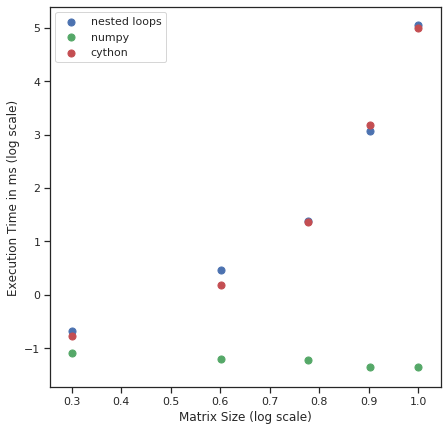

In [1011]:
#plot the results for determinant
import matplotlib.pyplot as plt

#add columns in log scale
df['matrix_size_log'] = [np.log10(i) for i in df.matrix_size]
df['execution_time_ms_log'] = [np.log10(i) for i in df.execution_time_ms]

#define figure and plot all three different methods
fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(111)
ax1.scatter(df.matrix_size_log[df.method == 'nested loops'], df.execution_time_ms_log[df.method == 'nested loops'], 
            s=50, c='b', marker="o",label='nested loops')
ax1.scatter(df.matrix_size_log[df.method == 'numpy'], df.execution_time_ms_log[df.method == 'numpy'], 
            s=50, c='g', marker="o", label='numpy')
ax1.scatter(df.matrix_size_log[df.method == 'cython'], df.execution_time_ms_log[df.method == 'cython'], 
            s=50, c='r', marker="o", label='cython')
plt.legend(loc='upper left')
plt.xlabel('Matrix Size (log scale)')
plt.ylabel('Execution Time in ms (log scale)')

plt.show()

ANSWER FOR DETERMINANT:

The plot above shows how numpy is again performing extremely better than the other two methods based on for loops. Is interesting that matrix multiplication gives a linear behavior for the execution time (first graph above), while the determinant gives exponential behavior for both python and cython(for loops) but still linear behavior with the numpy method. This shows how computing a determinant is extremely inefficient and slow as compared to matrix multiplication. In short, I guess this exercise shows clear evidence how using packages such as numpy really benefits execution time as it is optimized for operations like the ones observed here. 

### IO Exercises

Below is a map of various datatypes in python that you have come across and their corresponding JSON equivalents.

$$Datatypes=\left[ \begin{array}{cc} JSON & Python3 \\ object & dictionary \\ array & list \\ string & string \\ integer	& integer \\ real number & float \\ true & True \\ false & False \\ null & None  \end{array} \right]$$


There are atleast two very important python datatypes missing in the above list. 
Can you find the same?  [list the two mising python datatypes in this markdown cell below]

1. tuple
2. set

Now We can save the above map as a dictionary with Key-value pairs 
1. create a python dictionary named dataypes, having the above map as the Key-value pairs with Python datatypes as values and JSON equivalents as keys.
2. Save it as a pickle called datatypes and gzip the same.
3. Reload this pickle, and read the file contents and output the data in the following formatted way as given in this example - "The JSON equivalent for the Python datatype Dictionary is Object". Output similarly for the rest of the key-value pairs.
4. Save this data as a JSON but using Python datatypes as keys and JSON equivalent as values this time. 

In [1012]:
#1. create a python dictionary named dataypes, having the above map as the Key-value pairs with Python 
#datatypes as values and JSON equivalents as keys.

#define lists and put them together as tuple
JSON_dtypes = ['JSON','object', 'array','string','integer','realnumber','true','false','null','array','array']
python_dtypes = ['Python3','dictionary','list','string','integer','float','True','False','None','tuple','set']
comb_dtypes = tuple(zip(JSON_dtypes,python_dtypes))

#create dictionary
dict_dtypes = {} 
for json,python in comb_dtypes:
    try:
        dict_dtypes[json].append(python)
    except KeyError:
        dict_dtypes[json] = [python]
dict_dtypes

{'JSON': ['Python3'],
 'object': ['dictionary'],
 'array': ['list', 'tuple', 'set'],
 'string': ['string'],
 'integer': ['integer'],
 'realnumber': ['float'],
 'true': ['True'],
 'false': ['False'],
 'null': ['None']}

In [1013]:
#2. Save it as a pickle called datatypes and gzip the same.
import pickle
import gzip

with gzip.open('datatypes.pickle', 'wb') as handle:
    pickle.dump(dict_dtypes, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [1014]:
#3. Reload this pickle, and read the file contents and output the data in the following formatted 
#way as given in this example - "The JSON equivalent for the Python datatype Dictionary is Object". 
#Output similarly for the rest of the key-value pairs.

with gzip.open('datatypes.pickle', 'rb') as handle:
    b = pickle.load(handle)
    print(b)
    file_contents_formatted = []
    for i in b:
        for j in range(len(b[i])):
            file_contents_formatted.append("The JSON equivalent for the Python datatype " + str(b[i][j]) 
                                           + ' is ' + str(i))
print('\n'.join(map(str, file_contents_formatted))) 

{'JSON': ['Python3'], 'object': ['dictionary'], 'array': ['list', 'tuple', 'set'], 'string': ['string'], 'integer': ['integer'], 'realnumber': ['float'], 'true': ['True'], 'false': ['False'], 'null': ['None']}
The JSON equivalent for the Python datatype Python3 is JSON
The JSON equivalent for the Python datatype dictionary is object
The JSON equivalent for the Python datatype list is array
The JSON equivalent for the Python datatype tuple is array
The JSON equivalent for the Python datatype set is array
The JSON equivalent for the Python datatype string is string
The JSON equivalent for the Python datatype integer is integer
The JSON equivalent for the Python datatype float is realnumber
The JSON equivalent for the Python datatype True is true
The JSON equivalent for the Python datatype False is false
The JSON equivalent for the Python datatype None is null


In [1015]:
#4. Save this data as a JSON but using Python datatypes as keys and JSON equivalent as values this time. 

#define lists and put them together as tuple
JSON_dtypes = ['JSON','object', 'array','string','integer','realnumber','true','false','null','array','array']
python_dtypes = ['Python3','dictionary','list','string','integer','float','True','False','None','tuple','set']
comb_dtypes = tuple(zip(python_dtypes,JSON_dtypes))

#create dictionary
dict_dtypes = {} 
for python,json in comb_dtypes:
    try:
        dict_dtypes[python].append(json)
    except KeyError:
        dict_dtypes[python] = [json]
print(dict_dtypes)

#save dictionary as json file
import json
with open('datatypes.json', 'w') as fp:
    json.dump(dict_dtypes, fp)

{'Python3': ['JSON'], 'dictionary': ['object'], 'list': ['array'], 'string': ['string'], 'integer': ['integer'], 'float': ['realnumber'], 'True': ['true'], 'False': ['false'], 'None': ['null'], 'tuple': ['array'], 'set': ['array']}


## Pandas Data Analysis
Pandas gives us a nice set of tools to work with columnar data (similar to R's dataframe). 
To learn how to use this it makes the most sense to use a real data set.
For this assignment we'll use the KDD Cup 1998 dataset, which can be sourced from http://kdd.ics.uci.edu/databases/kddcup98/kddcup98.html .


### Acquiring Data
First we pull the README file from the dataset into this notebook via the unix "curl" command.  Remember you can hide/minimize output cells via the button on the left of the output.

In [1016]:
!curl http://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/readme

As you can see this README describes several files which may be of use.  In particular there are two more documentation files (DOC and DIC) we should read to get an idea of the data format.  Bring these files into the notebook.

In [1017]:
#Get file cup98DOC.txt 
!curl http://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/cup98doc

In [1018]:
#Get file cup98DIC.txt 
!curl http://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/cup98dic

Now we wish to download the cup98lrn.zip file and unzip it into a new subdirectory called "data".  
However, since this file is pretty big we don't want to store it on github.  
Luckily git provides the [.gitignore](http://git-scm.com/docs/gitignore) file which allows us to specify files we don't want to put into our git repository.

Please do the following steps:

1. Add the directory "data" to the .gitignore file
2. Commit the new .gitignore file
3. Create a new directory "data"
4. Download http://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/cup98lrn.zip into the data directory
5. Unzip the cup98lrn.zip (we will only be using the unzipped version, so feel free to remove the zip file)
6. Run "git status" to show that the data directory is not an untracked file (this indicates it is ignored)

**NOTE:** These steps only need to be run once, it is advised you comment all the lines out by putting a # at the start of each line after they have run.  This will save you time in the future when you have to rerun all cells/don't want to spend a few minutes downloading the data file.

In [10]:
#1. Add the directory "data" to the .gitignore file
!echo "data" > .gitignore

In [14]:
#2. Commit the new .gitignore file
!git add /home/raulmartinez/Documents/DSE/2019-rgm001/DSE200/day_2_github_io_numpy_pandas/.gitignore
!git commit -m "Adding git ignore file"

[master bebd249] Adding git ignore file
 1 file changed, 1 insertion(+), 1 deletion(-)


In [15]:
#3. Create a new directory "data"
!mkdir "data"

In [22]:
#4. Download http://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/cup98lrn.zip into the data directory
%cd ~/Documents/DSE/2019-rgm001/DSE200/day_2_github_io_numpy_pandas/data/
!curl -LO http://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/cup98lrn.zip

/home/raulmartinez/Documents/DSE/2019-rgm001/DSE200/day_2_github_io_numpy_pandas/data
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 34.7M  100 34.7M    0     0  2588k      0  0:00:13  0:00:13 --:--:-- 2625k


In [23]:
#5. Unzip the cup98lrn.zip (we will only be using the unzipped version, so feel free to remove the zip file)
!unzip cup98lrn.zip
!rm cup98lrn.zip

Archive:  cup98lrn.zip
  inflating: cup98LRN.txt            


In [24]:
#6. Run "git status" to show that the data directory is not an untracked file (this indicates it is ignored)
!git status

On branch master
Your branch is ahead of 'origin/master' by 1 commit.
  (use "git push" to publish your local commits)

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   ../10_exercises.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	../.ipynb_checkpoints/

no changes added to commit (use "git add" and/or "git commit -a")


Now perform some basic sanity checks on the data.  Using a combination of unix/basic python answer the following questions:

1. How many lines are there?  
2. Is the file character seperated or fixed width format?
3. Is there a header?  If so how many fields are in it?
4. Do all rows have the same number of fields as the header?
5. Does anyhting in 1-4 disagree with the readme file or indicate erroneous data?

In [2]:
#1. How many lines are there?
%cd ~/Documents/DSE/2019-rgm001/DSE200/day_2_github_io_numpy_pandas/data/
!wc -l cup98LRN.txt

/home/raulmartinez/Documents/DSE/2019-rgm001/DSE200/day_2_github_io_numpy_pandas/data
95413 cup98LRN.txt


In [3]:
#2. Is the file character seperated or fixed width format?
!head cup98LRN.txt
#just from looking at the file below is clear the file is comma separated

ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,

In [4]:
#3. Is there a header? If so how many fields are in it?
# !head -n 1 cup98LRN.txt | tr ',' ' ' | wc -w #method #1
header_fields = !head -n 1 cup98LRN.txt | grep -o ',' | wc -l #method two, more accurate since it takes into account blank spaces within fields
header_fields = int(header_fields[0]) + 1
header_fields

481

In [8]:
#4. Do all rows have the same number of fields as the header?

#open file
with open('cup98LRN.txt') as f:
    #define content to read as lines
    content = f.readlines()
    
    #initialize variables
    flag_header = 0 
    count_diff_length_fields = 0 
    
    #loop through every line
    for line in content:
        line_list = line.split(',') #split every line by comma
        #find length of fields for header
        if flag_header == 0: 
            Num_fields_header = len(line_list)
            flag_header = 1 
        else: 
            if Num_fields_header != len(line_list):
                count_diff_length_fields+=1
#print results
print("Number of rows with different number of fields as the header: " + str(count_diff_length_fields))

#Note: Just for curiosity I was also working on a solution with mostly unix commands but I ran into issues with hexadecimal values
# with open('cup98LRN.txt') as f:
#     content = f.readlines()
#     count_true = 0
#     count_false = 0
#     for line in content:
#         line = str(line)
#         row_fields_count = !echo "$line" | grep -o ',' | wc -l         
#         row_fields_count = int(row_fields_count[0]) + 1
#         if row_fields_count == header_fields:
#             count_true+=1
#         else:
#             count_false+=1

481
Number of rows with different number of fields as the header: 0


In [9]:
#5. Does anyhting in 1-4 disagree with the readme file or indicate erroneous data?

#readme is below
"""
cup98LRN.zip    PKZIP compressed raw LEARNING data set. 
                Internal name: cup98LRN.txt 
                File size: 36,468,735 bytes zipped. 117,167,952 bytes 
                unzipped.
                Number of Records: 95412.
                Number of Fields: 481.
"""

# Nothing disagrees with the readme file. For clarification, in question number 1 there are 95412 entries 
#and 1 more line for the header for a total of 95413 lines

'\ncup98LRN.zip    PKZIP compressed raw LEARNING data set. \n                Internal name: cup98LRN.txt \n                File size: 36,468,735 bytes zipped. 117,167,952 bytes \n                unzipped.\n                Number of Records: 95412.\n                Number of Fields: 481.\n'

Give answers to questions 1-4 in this markdown cell:

1. 95413 lines
2. Is comma separated
3. 481 fields
4. Nothing disagrees with the readme file. For clarification, in question number 1 there are 95412 entries and 1 more line for the header for a total of 95413 lines

Now load the data file into a pandas data frame called "learn".  To save some time, we've loaded the data dictionary into col_types.  

Finally split learn into two data frames, learn_y: the targets (two columns described in the documentation) and learn_x: the predictors (everything but the targets)

In [1019]:
#Thank you for creating this dictionary
%cd /home/raulmartinez/Documents/DSE/2019-rgm001/DSE200/day_2_github_io_numpy_pandas
dict_file = open("dict.dat")
col_types = [ (x.split("\t")[0], x.strip().split("\t")[1]) for x in dict_file.readlines() ]

#Now load the data file into a pandas data frame called "learn".
%cd /home/raulmartinez/Documents/DSE/2019-rgm001/DSE200/day_2_github_io_numpy_pandas/data
Learn = pd.read_csv('cup98LRN.txt')

#Finally split learn into two data frames, learn_y: the targets (two columns described in the documentation) 
#and learn_x: the predictors (everything but the targets)
Learn_y = Learn[['TARGET_B','TARGET_D']]
print(Learn_y)
Learn_x = Learn.drop(['TARGET_B','TARGET_D'], axis=1)
print(Learn_x)

/home/raulmartinez/Documents/DSE/2019-rgm001/DSE200/day_2_github_io_numpy_pandas
/home/raulmartinez/Documents/DSE/2019-rgm001/DSE200/day_2_github_io_numpy_pandas/data


/home/raulmartinez/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


       TARGET_B  TARGET_D
0             0       0.0
1             0       0.0
2             0       0.0
3             0       0.0
4             0       0.0
...         ...       ...
95407         0       0.0
95408         0       0.0
95409         0       0.0
95410         1      18.0
95411         0       0.0

[95412 rows x 2 columns]
       ODATEDW OSOURCE  TCODE STATE    ZIP MAILCODE PVASTATE   DOB NOEXCH  \
0         8901     GRI      0    IL  61081                    3712      0   
1         9401     BOA      1    CA  91326                    5202      0   
2         9001     AMH      1    NC  27017                       0      0   
3         8701     BRY      0    CA  95953                    2801      0   
4         8601              0    FL  33176                    2001      0   
...        ...     ...    ...   ...    ...      ...      ...   ...    ...   
95407     9601     ASE      1    AK  99504                       0      0   
95408     9601     DCD      1    TX  77379    

### Summarizing Data
Now that we have loaded data into the learn table, we wish to to summarize the data.  
Write a function called summary which takes a pandas data frame and prints a summary of each column containing the following:

If the column is numeric:

1. Mean
2. Standard Deviation
3. Min/Max
4. Number of missing values (NaN, Inf, NA)

If the column is non alphabetical:

1. Number of distinct values
2. Number of missing values (NaN, INF, NA, blank/all spaces)
3. The frequency of the 3 most common values and 3 least common values

Format the output to be human readable.

For example:
> Field_1  
> mean: 50  
> std_dev: 25  
> min: 0  
> max: 100  
> missing: 5
>  
> Field_2  
> distinct_values: 100  
> missing: 10  
>  
> 3 most common:  
>   the: 1000  
>   cat: 950  
>   meows: 900  
>  
> 3 least common:  
>   dogs: 5  
>   lizards: 4  
>   eggs: 1  

In [1020]:
#function for numerical
def function_1(df):
    
    #use dictionary to select only those equal to numeric
    numeric_list = [col_types[i][0] for i in range(len(col_types)) if col_types[i][1] == 'Num']
    
    #loop through the num fields
    for numeric_field in numeric_list:
        
        #find clean values by removing blank,empty,nan,etc
        cleaned_field = Learn[numeric_field][~Learn[numeric_field].isin([np.nan,np.empty,np.inf,' '])]
        
        #print field
        print('"' + numeric_field + '"')
        
        #print statistics human readable
        print('mean: ' + str(np.mean(cleaned_field)))
        print('std_dev: ' + str(np.std(cleaned_field)))
        print('min: ' + str(np.min(cleaned_field)))
        print('max: ' + str(np.max(cleaned_field)))
        print('missing: ' + str(np.sum(Learn[numeric_field].isin([np.nan,np.empty,np.inf]))))
        print('\n')

In [1021]:
#I split both tasks into two different functions to better visualize the output

#print function for numeric
function_1(df)

"ODATEDW"
mean: 9141.363256194189
std_dev: 343.4529525047256
min: 8306
max: 9701
missing: 0


"TCODE"
mean: 54.22311658910829
std_dev: 953.8394772593415
min: 0
max: 72002
missing: 0


"DOB"
mean: 2723.6029325451727
std_dev: 2132.230120875766
min: 0
max: 9710
missing: 0


"AGE"
mean: 61.61164926756519
std_dev: 16.664082453605207
min: 1.0
max: 98.0
missing: 23665


"NUMCHLD"
mean: 1.5277732924269336
std_dev: 0.8068286984460314
min: 1.0
max: 7.0
missing: 83026


"INCOME"
mean: 3.8862477403340256
std_dev: 1.8549469890316608
min: 1.0
max: 7.0
missing: 21286


"WEALTH1"
mean: 5.345698500394633
std_dev: 2.742462448536668
min: 0.0
max: 9.0
missing: 44732


"HIT"
mean: 3.3214375550245254
std_dev: 9.306850017873007
min: 0
max: 241
missing: 0


"MBCRAFT"
mean: 0.15207481554584332
std_dev: 0.47001773750580145
min: 0.0
max: 6.0
missing: 52854


"MBGARDEN"
mean: 0.059166314206494666
std_dev: 0.26207478033756865
min: 0.0
max: 4.0
missing: 52854


"MBBOOKS"
mean: 1.1163823487945863
std_dev: 1.66994760

missing: 0


"HU1"
mean: 69.6968305873475
std_dev: 21.716964598986575
min: 0
max: 99
missing: 0


"HU2"
mean: 29.44577202029095
std_dev: 20.90001421796967
min: 0
max: 99
missing: 0


"HU3"
mean: 89.96660797383977
std_dev: 12.955141757309486
min: 0
max: 99
missing: 0


"HU4"
mean: 9.176476753448204
std_dev: 9.960693136118035
min: 0
max: 99
missing: 0


"HU5"
mean: 13.73727623359745
std_dev: 20.98154290262193
min: 0
max: 99
missing: 0


"HHD1"
mean: 35.6545298285331
std_dev: 13.034991482038748
min: 0
max: 99
missing: 0


"HHD2"
mean: 71.50389888064394
std_dev: 15.136672297902097
min: 0
max: 99
missing: 0


"HHD3"
mean: 58.755051775458014
std_dev: 16.23929021065764
min: 0
max: 99
missing: 0


"HHD4"
mean: 27.78055171257284
std_dev: 11.94139955569773
min: 0
max: 99
missing: 0


"HHD5"
mean: 81.92594222948895
std_dev: 14.106485859963469
min: 0
max: 99
missing: 0


"HHD6"
mean: 17.236008049301976
std_dev: 12.031144328473493
min: 0
max: 99
missing: 0


"HHD7"
mean: 7.8739152307885805
std_dev:

"LFC4"
mean: 69.80198507525259
std_dev: 14.983039330272765
min: 0
max: 99
missing: 0


"LFC5"
mean: 52.95529912379994
std_dev: 13.742237054579988
min: 0
max: 99
missing: 0


"LFC6"
mean: 64.11079319163208
std_dev: 16.389955198880298
min: 0
max: 99
missing: 0


"LFC7"
mean: 48.79856831425816
std_dev: 17.282322599322413
min: 0
max: 99
missing: 0


"LFC8"
mean: 70.10241898293715
std_dev: 30.76799146934568
min: 0
max: 99
missing: 0


"LFC9"
mean: 62.66276778602272
std_dev: 44.720615830231324
min: 0
max: 99
missing: 0


"LFC10"
mean: 6.636376975642476
std_dev: 9.24947153009827
min: 0
max: 99
missing: 0


"OCC1"
mean: 14.12276233597451
std_dev: 8.231431048079878
min: 0
max: 99
missing: 0


"OCC2"
mean: 12.595941810254475
std_dev: 7.138598857130634
min: 0
max: 99
missing: 0


"OCC3"
mean: 3.5410535362428206
std_dev: 2.5651576730792858
min: 0
max: 99
missing: 0


"OCC4"
mean: 12.403062507860646
std_dev: 5.540116807347548
min: 0
max: 99
missing: 0


"OCC5"
mean: 15.504988890286338
std_dev: 5.73

mean: 51.86981721376766
std_dev: 35.645380540778014
min: 0
max: 99
missing: 0


"HC12"
mean: 6.878463924873182
std_dev: 12.068260150892758
min: 0
max: 99
missing: 0


"HC13"
mean: 29.80200603697648
std_dev: 27.972976036470765
min: 0
max: 99
missing: 0


"HC14"
mean: 4.558336477591917
std_dev: 9.664071202145871
min: 0
max: 99
missing: 0


"HC15"
mean: 0.07096591623695132
std_dev: 0.49362355277165815
min: 0
max: 30
missing: 0


"HC16"
mean: 5.298736008049302
std_dev: 10.403068327404366
min: 0
max: 99
missing: 0


"HC17"
mean: 82.63049721209072
std_dev: 28.465150454088512
min: 0
max: 99
missing: 0


"HC18"
mean: 15.15286337148367
std_dev: 26.703967674681817
min: 0
max: 99
missing: 0


"HC19"
mean: 71.94456672116715
std_dev: 35.58087133492472
min: 0
max: 99
missing: 0


"HC20"
mean: 97.56156458307132
std_dev: 9.626001786042751
min: 0
max: 99
missing: 0


"HC21"
mean: 94.39388127279588
std_dev: 10.739614200099867
min: 0
max: 99
missing: 0


"MHUC1"
mean: 8.112836959711567
std_dev: 3.5309615

"LASTGIFT"
mean: 17.31312696516161
std_dev: 13.956556937481047
min: 0.0
max: 1000.0
missing: 0


"LASTDATE"
mean: 9548.100364733995
std_dev: 49.23540631342578
min: 9503
max: 9702
missing: 0


"FISTDATE"
mean: 9135.651647591498
std_dev: 320.3923400288578
min: 0
max: 9603
missing: 0


"NEXTDATE"
mean: 9151.02291693489
std_dev: 294.25553844179433
min: 7211.0
max: 9702.0
missing: 9973


"TIMELAG"
mean: 8.093739393017241
std_dev: 8.213193700964643
min: 0.0
max: 1088.0
missing: 9973


"AVGGIFT"
mean: 13.347785980803067
std_dev: 10.769941001508691
min: 1.2857142857
max: 1000.0
missing: 0


"CONTROLN"
mean: 95778.1769588731
std_dev: 55284.30637788143
min: 1
max: 191779
missing: 0


"TARGET_B"
mean: 0.05075881440489666
std_dev: 0.2195047998679706
min: 0
max: 1
missing: 0


"TARGET_D"
mean: 0.7930731983398315
std_dev: 4.4297018599311935
min: 0.0
max: 200.0
missing: 0


"HPHONE_D"
mean: 0.5006183708548191
std_dev: 0.49999961761732087
min: 0
max: 1
missing: 0


"CLUSTER2"
mean: 31.533711167086484


In [1022]:
#function for non-alphabetic
def function_2(df):
        #use dictionary to select only those equal to character
        nonalpha_list = [col_types[i][0] for i in range(len(col_types)) if col_types[i][1] == 'Char']

        #loop through char fields
        for nonalpha_field in nonalpha_list:

            #find distinct values and remove nan, spaces, blank, etc
            distinct_values = set(Learn[nonalpha_field][~Learn[nonalpha_field].isin([np.nan,np.empty,np.inf,' '])])

            #print field and number of missing values in human readable
            print('"' + nonalpha_field + '"')
            print('distinct_values: ' + str(len(distinct_values)))
            print('missing: ' + str(np.sum(Learn[nonalpha_field].isin([np.nan,np.empty,np.inf,' ']))))

            #find frequency for each word
            word_tuple = []
            for i in distinct_values:
                count = 0
                for j in Learn[nonalpha_field]:
                    if i == j:
                        count+=1
                word_tuple.append((i,count))

            #sort found values by count
            word_tuple = sorted(word_tuple, key=lambda x: x[1], reverse=True)

            #print new line
            print('\n')

            #print 3 most common
            print('3 most common:')
            for word,count in word_tuple[:3]:
                print(str(word)+': '+str(count))

            #print new line
            print('\n') 

            #print 3 least common
            print('3 least common:')
            for word,count in word_tuple[-3:]:
                print(str(word)+': '+str(count))

            #print new line
            print('\n')

In [1023]:
#print function for characters
function_2(df)

"OSOURCE"
distinct_values: 895
missing: 928


3 most common:
MBC: 4539
SYN: 3563
AML: 3430


3 least common:
NET: 1
NCF: 1
AI2: 1


"STATE"
distinct_values: 57
missing: 0


3 most common:
CA: 17343
FL: 8376
TX: 7535


3 least common:
DE: 3
DC: 1
AS: 1


"ZIP"
distinct_values: 19938
missing: 0


3 most common:
85351: 61
92653: 59
85710: 54


3 least common:
28479-: 1
68950: 1
17078-: 1


"MAILCODE"
distinct_values: 1
missing: 94013


3 most common:
B: 1399


3 least common:
B: 1399


"PVASTATE"
distinct_values: 2
missing: 93954


3 most common:
P: 1453
E: 5


3 least common:
P: 1453
E: 5


"NOEXCH"
distinct_values: 5
missing: 7


3 most common:
0: 61203
0: 33882
1: 195


3 least common:
1: 195
1: 90
X: 35


"RECINHSE"
distinct_values: 1
missing: 88709


3 most common:
X: 6703


3 least common:
X: 6703


"RECP3"
distinct_values: 1
missing: 93395


3 most common:
X: 2017


3 least common:
X: 2017


"RECPGVG"
distinct_values: 1
missing: 95298


3 most common:
X: 114


3 least common:
X: 11



3 most common:
X: 95118
C: 109
L: 70


3 least common:
L: 70
D: 65
I: 50


"MDMAUD_F"
distinct_values: 4
missing: 0


3 most common:
X: 95118
1: 187
2: 87


3 least common:
1: 187
2: 87
5: 20


"MDMAUD_A"
distinct_values: 5
missing: 0


3 most common:
X: 95118
C: 249
L: 23


3 least common:
L: 23
M: 17
T: 5


"GEOCODE2"
distinct_values: 4
missing: 319


3 most common:
A: 34484
B: 28505
D: 16580


3 least common:
B: 28505
D: 16580
C: 15524




 ### Pandas analysis on Calit2 data 

Import data from http://archive.ics.uci.edu/ml/machine-learning-databases/event-detection/CalIt2.data using curl

This data comes from the main door of the CalIt2 building at UCI. Observations come from 2 data streams (people flow in and out of the building), over 15 weeks, 48 time slices per day (half hour count aggregates).

Attribute Information:
1. Flow ID: 7 is out flow, 9 is in flow
2. Date: MM/DD/YY
3. Time: HH:MM:SS
4. Count: Number of counts reported for the previous half hour


In [1024]:
#import and clean data
%cd /home/raulmartinez/Documents/DSE/2019-rgm001/DSE200/day_2_github_io_numpy_pandas/data 
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/event-detection/CalIt2.data > CalIt2.data
colnames = ['Flow ID','Date','Time','Count']
df = pd.read_csv('CalIt2.data', names=colnames, header=None)
df
    
#alternative solution, more painful!!!!! 
#import and clean data
# inData = !curl http://archive.ics.uci.edu/ml/machine-learning-databases/event-detection/CalIt2.data
# inData = list(inData)

# #separate data by blanks
# inData_split = [i.split(' ') for i in inData]

# #append last entry, according to the format this will one contains the time slice
# new_list = []
# for i in inData_split:
#     if len(i) == 1:
#         new_list.append(i)
#     else:
#         new_list.append(i[len(i)-1])

# #find missing slice
# missing_slice = [list(i) for i in new_list if type(i)==str]
# missing_slice = [''.join(i) for i in missing_slice]
# missing_slice = [i for i in missing_slice if ((len(i) == 22)or(len(i) == 21))]

# #select old lists and append missing lists to form the final list
# new_list = [list(i) for i in new_list if type(i)==list]
# final_list = [[i for i in missing_slice]] + [i for i in new_list if len(i[0]) > 20]
# final_list

/home/raulmartinez/Documents/DSE/2019-rgm001/DSE200/day_2_github_io_numpy_pandas/data
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  218k  100  218k    0     0  1515k      0 --:--:-- --:--:-- --:--:-- 1515k


,Flow ID,Date,Time,Count
0,7,07/24/05,00:00:00,0
1,9,07/24/05,00:00:00,0
2,7,07/24/05,00:30:00,1
3,9,07/24/05,00:30:00,0
4,7,07/24/05,01:00:00,0
...,...,...,...,...
10075,9,11/05/05,22:30:00,0
10076,7,11/05/05,23:00:00,0
10077,9,11/05/05,23:00:00,0
10078,7,11/05/05,23:30:00,1


#### Selecting Data ####
1. Select all data for the date July 24 2005 having flow id=7. Also output the row count of results 
2. Select all rows whose count is greater than 5. Sort the result on count in descending order and output the top 10 rows

In [1025]:
#1. Select all data for the date July 24 2005 having flow id=7. Also output the row count of results

#define filters
filter_date = '07/24/05'
filter_flowid = 7

#keep all data with filters
alldata_with_filters = df[(df['Date']==filter_date)&(df['Flow ID']==filter_flowid)]
print(alldata_with_filters)

#output row counts
print('Row Count of Results: ' + str(len(alldata_with_filters)))

    Flow ID      Date      Time  Count
0         7  07/24/05  00:00:00      0
2         7  07/24/05  00:30:00      1
4         7  07/24/05  01:00:00      0
6         7  07/24/05  01:30:00      0
8         7  07/24/05  02:00:00      0
10        7  07/24/05  02:30:00      2
12        7  07/24/05  03:00:00      0
14        7  07/24/05  03:30:00      0
16        7  07/24/05  04:00:00      0
18        7  07/24/05  04:30:00      0
20        7  07/24/05  05:00:00      0
22        7  07/24/05  05:30:00      0
24        7  07/24/05  06:00:00      0
26        7  07/24/05  06:30:00      0
28        7  07/24/05  07:00:00      0
30        7  07/24/05  07:30:00      2
32        7  07/24/05  08:00:00      0
34        7  07/24/05  08:30:00      0
36        7  07/24/05  09:00:00      0
38        7  07/24/05  09:30:00      1
40        7  07/24/05  10:00:00      0
42        7  07/24/05  10:30:00      0
44        7  07/24/05  11:00:00      1
46        7  07/24/05  11:30:00      0
48        7  07/24/05  12

In [1026]:
#2. Select all rows whose count is greater than 5. Sort the result on count in descending order and output the top 10 rows

#define threshold and apply
threshold = 5
new_df = df[df.Count>threshold]

#sort values in descending order
new_df = new_df.sort_values(by=['Count'],ascending=False)

#output top 10 rows
new_df = new_df.iloc[0:10]
new_df

,Flow ID,Date,Time,Count
6879,9,10/03/05,15:30:00,62
335,9,07/27/05,11:30:00,61
6881,9,10/03/05,16:00:00,55
9686,7,11/01/05,21:30:00,54
9682,7,11/01/05,20:30:00,54
9681,9,11/01/05,20:00:00,53
6878,7,10/03/05,15:30:00,52
9933,9,11/04/05,11:00:00,50
8913,9,10/24/05,20:00:00,50
3615,9,08/30/05,15:30:00,50


#### Apply function ####
1. For the 10 rows outputted above, use Pandas Apply function to subtract lowest value of the 10 from all of them and then output the average value of the resulting counts
2. On the entire data, use apply function to sum all counts with flow_id=9 and date is 07/24/05

In [1027]:
#1. For the 10 rows outputted above, use Pandas Apply function to subtract lowest value of the 10 from 
#all of them and then output the average value of the resulting counts

#define function to subtract
def function_1(num,min_value):
    return num-min_value

#define minimum value and subtract from every row element of count
min_value = min(new_df.Count)
new_list = new_df.apply(lambda x: function_1(x['Count'],min_value), axis=1)
print(new_list)

#output the average of the resulting counts
average_values = np.mean(new_list)
print('Average value of the resulting counts: ' + str(average_values))

6879    12
335     11
6881     5
9686     4
9682     4
9681     3
6878     2
9933     0
8913     0
3615     0
dtype: int64
Average value of the resulting counts: 4.1


In [1028]:
#2. On the entire data, use apply function to sum all counts with flow_id=9 and date is 07/24/05

def function_filter(flowid,date):
    if((flowid == 9)&(date == '07/24/05')):
        return True
    else:
        return False
    
sum_counts = sum(df.Count[df.apply(lambda x: function_filter(x['Flow ID'],x['Date']), axis=1)])
sum_counts

# #here is another method below
# filter_date = '07/24/05'
# filter_flowid = 9
# #keep all data with filters
# alldata_with_filters = df[(df['Date']==filter_date)&(df['Flow ID']==filter_flowid)]
# print(alldata_with_filters)
# sum(alldata_with_filters.Count)
# print(sum(alldata_with_filters.Count))

16

#### Indexing an Selecting ####
Explain the following

1. loc: 
2. iloc:
4. at:
5. iat:

Highlight the differences by providing usecases where one is more useful than the other


Write a function to take two dates as input and return all flow ids and counts in that date range having both the dates inclusive. You can use pandas to_datetime function to convert the date to pandas datetime format 

In [ ]:
#Highlight the differences by providing usecases where one is more useful than the other

In [1030]:
#loc:

#loc allows you to use modified dataframes where indices are labels

#assing date column as index to show power of loc
df_loc = df.copy()
df_loc.set_index('Date',inplace=True)
print(df_loc.head())

#you can directly select row with index values from dataframe
df_loc1 = df_loc.loc[['07/24/05','10/03/05']]
print(df_loc1)

#you can also those indices to select certain columns
df_loc2 = df_loc.loc[['07/24/05','10/03/05'],['Flow ID','Count']]
print(df_loc2.head())

#using boolean with loc
df_loc3 = df_loc.loc[df_loc['Time']=='00:30:00',['Time','Flow ID','Count']]
print(df_loc3.head())


          Flow ID      Time  Count
Date                              
07/24/05        7  00:00:00      0
07/24/05        9  00:00:00      0
07/24/05        7  00:30:00      1
07/24/05        9  00:30:00      0
07/24/05        7  01:00:00      0
          Flow ID      Time  Count
Date                              
07/24/05        7  00:00:00      0
07/24/05        9  00:00:00      0
07/24/05        7  00:30:00      1
07/24/05        9  00:30:00      0
07/24/05        7  01:00:00      0
...           ...       ...    ...
10/03/05        9  22:30:00      0
10/03/05        7  23:00:00      1
10/03/05        9  23:00:00      0
10/03/05        7  23:30:00      0
10/03/05        9  23:30:00      0

[192 rows x 3 columns]
          Flow ID  Count
Date                    
07/24/05        7      0
07/24/05        9      0
07/24/05        7      1
07/24/05        9      0
07/24/05        7      0
              Time  Flow ID  Count
Date                              
07/24/05  00:30:00        7    

In [1031]:
#iloc:

#iloc allows you to select based on integer index positions, rather than labels similar to loc

#copy dataframe 
df_iloc = df.copy()

#select different positions for rows and all columns
df_iloc1 = df_iloc.iloc[0:2,:]
print(df_iloc1)

#select different positions for columns and all rows
df_iloc2 = df_iloc.iloc[:,0:3]
print(df_iloc2)

#select a range of row and column positions
df_iloc3 = df_iloc.iloc[0:4,-2:]
print(df_iloc3)

   Flow ID      Date      Time  Count
0        7  07/24/05  00:00:00      0
1        9  07/24/05  00:00:00      0
       Flow ID      Date      Time
0            7  07/24/05  00:00:00
1            9  07/24/05  00:00:00
2            7  07/24/05  00:30:00
3            9  07/24/05  00:30:00
4            7  07/24/05  01:00:00
...        ...       ...       ...
10075        9  11/05/05  22:30:00
10076        7  11/05/05  23:00:00
10077        9  11/05/05  23:00:00
10078        7  11/05/05  23:30:00
10079        9  11/05/05  23:30:00

[10080 rows x 3 columns]
       Time  Count
0  00:00:00      0
1  00:00:00      0
2  00:30:00      1
3  00:30:00      0


In [1032]:
#at:

#works similar to loc but you only get a single value or a list of matching values

#copy dataframe 
df_at = df.copy()
df_at.set_index('Date',inplace=True)
print(df_at.head())

#compare at1 and loc1. See how at1 gives back a 1D numpy array while loc. returns the same values with 
#its respective index as a series. In essence, at1 saves you one step if you only look for the values
df_at1 = df_at.at['07/24/05','Flow ID']
df_loc1 = df_at.loc['07/24/05','Flow ID']
print(df_at1)
print(df_loc1)

          Flow ID      Time  Count
Date                              
07/24/05        7  00:00:00      0
07/24/05        9  00:00:00      0
07/24/05        7  00:30:00      1
07/24/05        9  00:30:00      0
07/24/05        7  01:00:00      0
[7 9 7 9 7 9 7 9 7 9 7 9 7 9 7 9 7 9 7 9 7 9 7 9 7 9 7 9 7 9 7 9 7 9 7 9 7
 9 7 9 7 9 7 9 7 9 7 9 7 9 7 9 7 9 7 9 7 9 7 9 7 9 7 9 7 9 7 9 7 9 7 9 7 9
 7 9 7 9 7 9 7 9 7 9 7 9 7 9 7 9 7 9 7 9 7 9]
Date
07/24/05    7
07/24/05    9
07/24/05    7
07/24/05    9
07/24/05    7
           ..
07/24/05    9
07/24/05    7
07/24/05    9
07/24/05    7
07/24/05    9
Name: Flow ID, Length: 96, dtype: int64


In [1033]:
#iat:

#works similar to iloc but you only get a single value or a list of matching values

#copy dataframe 
df_iat = df.copy()
print(df_iat.head())

#compare iat1 and iloc1. With both of them you can return a single value from the dataframe, however, iat won't let you 
#a range just the way we did with iloc above; for example df_iat.iat[0:3,3] will throw an error but df_iat.iat[0:3,3] won't
df_iat1 = df_iat.iat[3,3]
df_iloc1 = df_iat.iloc[3,3]
print(df_iat1)
print(df_iloc1)

   Flow ID      Date      Time  Count
0        7  07/24/05  00:00:00      0
1        9  07/24/05  00:00:00      0
2        7  07/24/05  00:30:00      1
3        9  07/24/05  00:30:00      0
4        7  07/24/05  01:00:00      0
0
0


In [1034]:
#Write a function to take two dates as input and return all flow ids and counts in that date range having both the 
#dates inclusive. You can use pandas to_datetime function to convert the date to pandas datetime format

import datetime 
df_copy = df.copy()

def get_date_range(df_copy,dates):
    
    #convert dataframe's date column to datetime format. Do the same for input dates
    df_copy['Date'] = [datetime.datetime.strptime(i, '%m/%d/%y') for i in df_copy['Date']]
    dates_ = [datetime.datetime.strptime(i, '%m/%d/%y') for i in dates]
    
    #set dates column as indices
    df_copy.set_index(['Date'],inplace=True)
    
    #use loc to find the range of dates and other labels wanted
    df_copy = df_copy.loc[dates_[0]:dates_[1],['Flow ID','Count']]
    
    #return as dataframe
    return df_copy

dates = ['07/24/05','07/26/05'] #enter dates in descending order
df_out = get_date_range(df.copy(),dates)
df_out

,Flow ID,Count
Date,,
2005-07-24,7,0
2005-07-24,9,0
2005-07-24,7,1
2005-07-24,9,0
2005-07-24,7,0
...,...,...
2005-07-26,9,1
2005-07-26,7,1
2005-07-26,9,0


#### Grouping ####
1. Select data in the month of August 2005 having flow id=7
2. Group the data based on date and get the max count per date

In [1038]:
# 1. Select data in the month of August 2005 having flow id=7

df_filtered1 = df[df['Date'].str.startswith('08/') & df['Date'].str.endswith('/05') & (df['Flow ID']==7)]
df_filtered1

,Flow ID,Date,Time,Count
768,7,08/01/05,00:00:00,1
770,7,08/01/05,00:30:00,0
772,7,08/01/05,01:00:00,0
774,7,08/01/05,01:30:00,0
776,7,08/01/05,02:00:00,0
...,...,...,...,...
3734,7,08/31/05,21:30:00,0
3736,7,08/31/05,22:00:00,2
3738,7,08/31/05,22:30:00,1
3740,7,08/31/05,23:00:00,0


In [1039]:
# 2. Group the data based on date and get the max count per date

df_grouped = df_filtered1.groupby(['Date'])['Count'].max()
df_grouped

Date
08/01/05    18
08/02/05    16
08/03/05    26
08/04/05    40
08/05/05    17
08/06/05     8
08/07/05     3
08/08/05    16
08/09/05    19
08/10/05    25
08/11/05    16
08/12/05    21
08/13/05     5
08/14/05     3
08/15/05    17
08/16/05    24
08/17/05    22
08/18/05    39
08/19/05    23
08/20/05     3
08/21/05     4
08/22/05    23
08/23/05    25
08/24/05    17
08/25/05    24
08/26/05    22
08/27/05     3
08/28/05     7
08/29/05    15
08/30/05    47
08/31/05    19
Name: Count, dtype: int64

#### Stacking, Unstacking ####
1. Stack the data with count and flow_id as indexes
2. Use reset_index to reset the stacked hierarchy by 1 level. The index then will just be the counts
3. Unstack the data to get back original data

In [1040]:
#1. Stack the data with count and flow_id as indexes
df_stack = df.copy()
df_stack = df_stack.set_index(['Flow ID','Count'])
df_stack = df_stack.stack()
df_stack

Flow ID  Count      
7        0      Date    07/24/05
                Time    00:00:00
9        0      Date    07/24/05
                Time    00:00:00
7        1      Date    07/24/05
                          ...   
9        0      Time    23:00:00
7        1      Date    11/05/05
                Time    23:30:00
9        0      Date    11/05/05
                Time    23:30:00
Length: 20160, dtype: object

In [1041]:
#2. Use reset_index to reset the stacked hierarchy by 1 level. The index then will just be the counts
df_stack.reset_index(level='Flow ID') #####  this is same as level 1, but please specify it next time

Flow ID         0
Count                        
0     Date        7  07/24/05
      Time        7  00:00:00
      Date        9  07/24/05
      Time        9  00:00:00
1     Date        7  07/24/05
...             ...       ...
0     Time        9  23:00:00
1     Date        7  11/05/05
      Time        7  23:30:00
0     Date        9  11/05/05
      Time        9  23:30:00

[20160 rows x 2 columns]

In [1042]:
#3. Unstack the data to get back original data
print(df_stack)
df_stack.reset_index(level='Flow ID').unstack()

#index contains duplicate entries. IGNORED THIS PART OF THE QUESTION AS TOLD BY THE TA

Flow ID  Count      
7        0      Date    07/24/05
                Time    00:00:00
9        0      Date    07/24/05
                Time    00:00:00
7        1      Date    07/24/05
                          ...   
9        0      Time    23:00:00
7        1      Date    11/05/05
                Time    23:30:00
9        0      Date    11/05/05
                Time    23:30:00
Length: 20160, dtype: object


ValueError: Index contains duplicate entries, cannot reshape

#### Pandas and Matplotlib

Plot a histogram of date vs total counts for flow_id=7 and flow_id=9 for the month of July 2005

In [1046]:
#import libraries
import pandas as pd

#find new dataframe with filters mentioned above
df_histogram = df[df['Date'].str.startswith('07/') & df['Date'].str.endswith('/05') & ((df['Flow ID']==7)|(df['Flow ID']==9))]

#find total counts per date
df_histogram = df_histogram.groupby(['Flow ID','Date'], as_index=False).agg({'Count':'sum'})
print(df_histogram)

    Flow ID      Date  Count
0         7  07/24/05     25
1         7  07/25/05    162
2         7  07/26/05    220
3         7  07/27/05    230
4         7  07/28/05    244
5         7  07/29/05    220
6         7  07/30/05     15
7         7  07/31/05     24
8         9  07/24/05     16
9         9  07/25/05    176
10        9  07/26/05    217
11        9  07/27/05    247
12        9  07/28/05    271
13        9  07/29/05    233
14        9  07/30/05      9
15        9  07/31/05      9


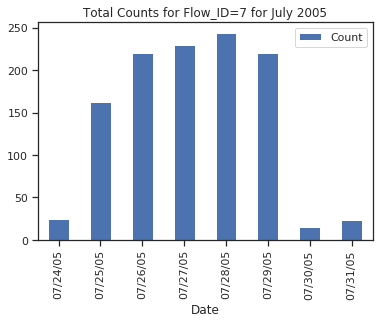

In [1047]:
#plot histogram for flow id equal 7
df_histogram_7 = df_histogram[df_histogram['Flow ID']==7]
df_histogram_7.set_index('Date').Count.plot(kind='bar',legend=True,title='Total Counts for Flow_ID=7 for July 2005')

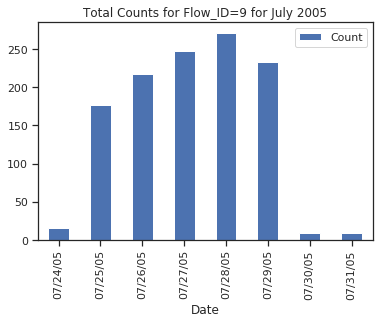

In [1048]:
#plot histogram for flow id equal 9
df_histogram_9 = df_histogram[df_histogram['Flow ID']==9]
df_histogram_9.set_index('Date').Count.plot(kind='bar',legend=True,title='Total Counts for Flow_ID=9 for July 2005')